# E-Commerce_Customer Segmentation and Valuation

## Problem Statements :

1. Segment Customers on the basis of their Recency, Frequency and Monetary.
2. Analyse the Trends based on Days, Months, Seasons and Time.
3. Top 10 Selling Product and Best Product at Country level.
4. Finding CUSTOMER LIFETIME VALUE (CLV).

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Online_shopping.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df1 = df.copy()

In [5]:
# Countries Details

df1["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

# Data Information

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


- The dataset contains total 5,41,909 observations and 9 features. As it is a clustering problem, there is no target column. 
- The feature - "InvoiceNo" is already in datetime format.
- The features - "lower", "Description", "CustomerID" are having null values.

- Dropping the features which are non-significant for customer segmentation.
- Non-significant features -  "StockCode", "lower", "Description", "Country"

In [7]:
# Dropping the features which are not required to calculate R, F, M

df1 = df1.drop(["StockCode", "lower", "Description", "Country"], axis=1)
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


# Missing Value Analysis

In [8]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

- Here there are large no.of missing values in CustomerID. 
- As the CustomerID is unique to each customer, imputation is not meaningful. 
- Also, the feature "CustomerID" is important for segmentation So we will drop the record wherever the CustomerID is missing instead of imputing or dropping the whole feature.

In [9]:
# Droping the missing value in the feature - "CustomerID"

df1.dropna(axis=0, how="any", inplace=True)

In [10]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

### Checking the 5 Point Summary of Features

In [11]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


- In "Quantity" - the minimum value is negative. Reason: Generally it happens when customer returns the product(defective)

- Also, in "UnitPrice" - the minimum value is 0. Reason: May be some free items are included in it.

In [12]:
# Below are the observations where "UnitPrice" is 0.

df1[df1["UnitPrice"]==0].head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0


In [13]:
# Total number of observations where "UnitPrice" is 0.

df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [14]:
# Here in dataset the quatity is negative also. so, we will only take the quantity above 0.

df1 = df1[df["Quantity"]>0]

In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [16]:
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


### Creating A new feature - "Total_Sum" (Quantity * UnitPrice)

In [17]:
df1["Total_Sum"] = df1["Quantity"] * df1["UnitPrice"]

In [18]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sum
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [19]:
# Dropping the  feature - "Quantity" and "UnitPrice"

df2 = df1.drop(["Quantity", "UnitPrice"], axis=1)

In [20]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


- For the same InvoiceNO there is different entry for each and every items. So, to obtained total sale we will add the "Total_sum" of the same InvoiceNO by applying the groupby and sum function.   

In [21]:
# Using the Groupby Function to find the total amount w.r.t InvoiceNo.

df_final = df2.groupby(["InvoiceNo", "InvoiceDate", "CustomerID"]).agg({"Total_Sum" : "sum"}).reset_index()

In [22]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total_Sum    18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


# Problem Statement - 1 : Customer segmentation on the basis of Recency,   Frequency and Monetary.

1. Recency- How recently visited
2. Frequency- Total how many times visited
3. Monetary- Total amount spend

In [24]:
# Check the last date of our dataset

max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [25]:
# Check the Starting date of our dataset

min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

- As per the start date and last date we can say that this dataset is of 1 year (Dec 2010 to Dec 2011)

#### Creating the latest date by adding +1 to last date of the dataset

In [26]:
import datetime as dt

In [27]:
latest_date = dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

# Now, Calculating Recency, Frequency, Monetary Keeping "CustomerID" as Reference

### Recency --> difference between invoice date and latest date
### Frequency --> count of InvoiceNo w.r.t CustomerID
### Monetary --> sum of Total_sum w.r.t CustomerID

In [28]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [29]:
RFM_Score = df_final.groupby("CustomerID").agg({"InvoiceDate" : lambda x: (latest_date - x.max()).days,
                                               "InvoiceNo" : lambda x: x.count(),
                                               "Total_Sum" : lambda x: x.sum()}).reset_index()

In [30]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total_Sum
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


### Renaming the features as Recency, Frequency, Monetary

In [31]:
# Renaming the columns

RFM_Score = RFM_Score.rename(columns={"InvoiceDate":"Recency", "InvoiceNo":"Frequency", "Total_Sum":"Monetary"})

In [32]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


## 5 Point Summary of dataset - "RFM_Score"

In [33]:
RFM_Score.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,4.278866,2053.793018
std,1721.889758,100.007757,7.727621,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,1.000000,307.245000
50%,15299.000000,50.000000,2.000000,674.450000
75%,16778.500000,141.500000,5.000000,1661.640000
max,18287.000000,373.000000,211.000000,280206.020000


- we will segregate and make groups of R,F,M individually based on their percentile values and assign scores to each group.
- The segmentation of the customers can be done as per the total scores.

## Recency

<Axes: xlabel='Recency', ylabel='Proportion'>

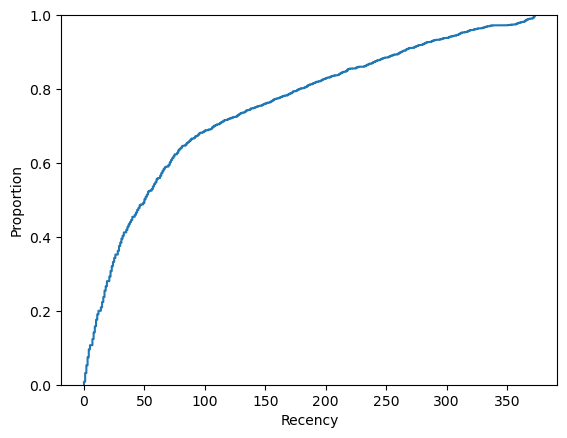

In [34]:
# Plotting the ECDF(Emperical Cumulative Distribution Function) graph to decide the Benchmark or Quantiles to segregate
# the customers.

sns.ecdfplot(data = RFM_Score["Recency"])

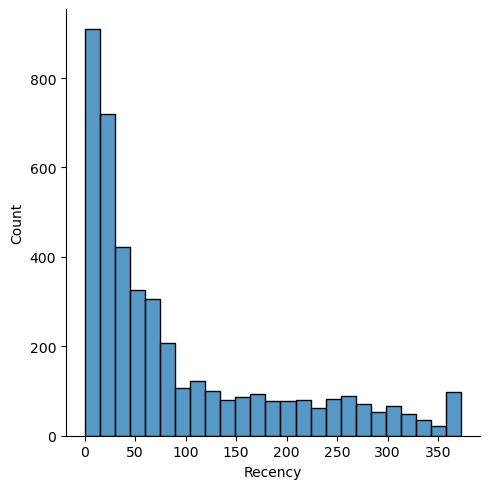

In [35]:
sns.displot(x = RFM_Score["Recency"])

#### Making 4 groups - customer visited 1 month ago, 2 months ago, 4 months ago, more than 4 months

In [36]:
RFM_Score["Recency"].quantile(q=[0.39,0.56,0.72])

0.39     31.00
0.56     63.00
0.72    120.36
Name: Recency, dtype: float64

## Frequency

<Axes: xlabel='Frequency', ylabel='Proportion'>

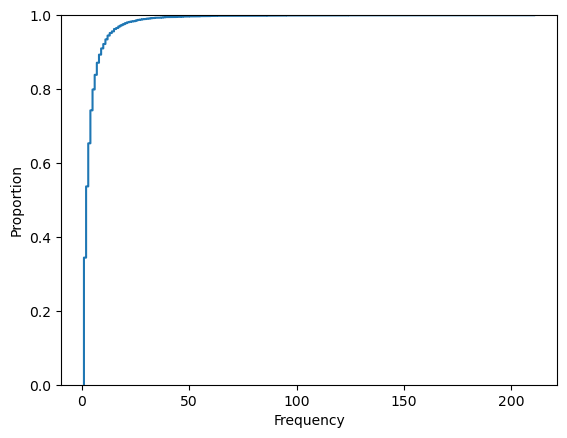

In [37]:
sns.ecdfplot(data = RFM_Score["Frequency"])

#### Making 5 groups - customer visited more than 40 times, more than 20 times, more than 12 times, more than 5 times, less than 5 times.

In [38]:
RFM_Score["Frequency"].quantile(q=[0.75,0.94,0.977,0.995])

0.750     5.00
0.940    12.00
0.977    20.00
0.995    41.93
Name: Frequency, dtype: float64

## Monetary

<Axes: xlabel='Monetary', ylabel='Proportion'>

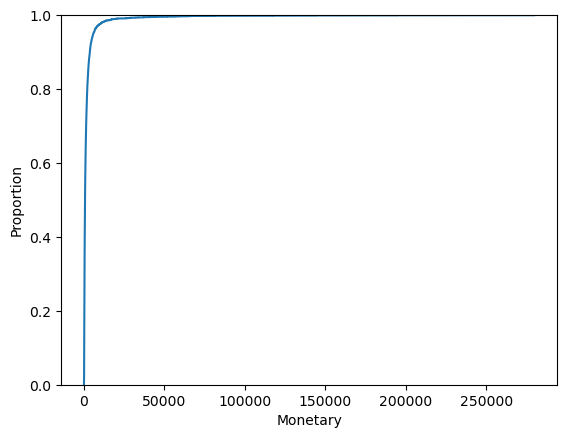

In [39]:
sns.ecdfplot(data = RFM_Score["Monetary"])

#### Making 6 groups - customer spent < 1,000,   < 2,000,   <5,000,   < 26,000  and  more than 26,000.

In [40]:
RFM_Score["Monetary"].quantile(q=[0.62,0.80,0.938,0.9915])

0.6200     1013.16320
0.8000     2057.91400
0.9380     5059.56728
0.9915    26059.66428
Name: Monetary, dtype: float64

In [41]:
R_quant = RFM_Score.quantile(q = [0.39,0.56,0.72]) # Recency
F_quant = RFM_Score.quantile(q = [0.75,0.94,0.977,0.995]) # Frequency
M_quant = RFM_Score.quantile(q = [0.62,0.80,0.938,0.9915]) # Monetary

# Function for R, F, M Scoring

In [42]:
def RScoring(x,p,d):
    if x <= d[p][0.39]:
        return 4
    elif x <= d[p][0.56]:
        return 3
    elif x <= d[p][0.72]:
        return 2
    else:
        return 1

In [43]:
def FScoring(x,p,d):
    if x <= d[p][0.75]:
        return 1
    elif x <= d[p][0.94]:
        return 2
    elif x <= d[p][0.977]:
        return 3
    elif x <= d[p][0.995]:
        return 4
    else:
        return 5

In [44]:
def MScoring(x,p,d):
    if x <= d[p][0.62]:
        return 1
    elif x <= d[p][0.80]:
        return 2
    elif x <= d[p][0.938]:
        return 3
    elif x <= d[p][0.9915]:
        return 4
    else:
        return 5
    

# R,F,M score for each customer

In [45]:
RFM_Score["R"] = RFM_Score["Recency"].apply(RScoring, args = ("Recency", R_quant))
RFM_Score["F"] = RFM_Score["Frequency"].apply(FScoring, args = ("Frequency", F_quant))
RFM_Score["M"] = RFM_Score["Monetary"].apply(MScoring, args = ("Monetary", M_quant))

In [46]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,4,2,3
2,12348.0,75,4,1797.24,2,1,2
3,12349.0,18,1,1757.55,4,1,2
4,12350.0,310,1,334.40,1,1,1


### Adding R,F,M Score

In [47]:
RFM_Score["RFM_Sum"] = RFM_Score[["R", "F", "M"]].sum(axis=1)

In [48]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Sum
0,12346.0,325,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,4,2,3,9
2,12348.0,75,4,1797.24,2,1,2,5
3,12349.0,18,1,1757.55,4,1,2,7
4,12350.0,310,1,334.40,1,1,1,3


In [49]:
RFM_Score["RFM_Sum"].value_counts()

3     1056
6      888
5      613
4      557
7      379
8      284
9      276
10     117
11      80
12      59
14      17
13      13
Name: RFM_Sum, dtype: int64

# Assigning Loyality type to each customer

In [50]:
loyality_label = ["Platinum", "Diamond", "Gold", "Silver"]

In [51]:
RFM_Score["RFM_Sum"].quantile(q = [0.37, 0.71, 0.94])

0.37     4.0
0.71     6.0
0.94    10.0
Name: RFM_Sum, dtype: float64

- 3-4 --> Silver Category  ,  5-6 --> Gold Category
- 7-10 --> Diamond Category  ,  11-14 --> Platinum Category

In [52]:
def loyality(x):
    if x <= 4:
        return "Silver"
    elif x <= 6:
        return "Gold"
    elif x <= 10:
        return "Diamond"
    else:
        return "Platinum"

In [53]:
RFM_Score["Loyality_Label"] = RFM_Score["RFM_Sum"].apply(loyality)

In [54]:
RFM_Score["Loyality_Label"].value_counts()

Silver      1613
Gold        1501
Diamond     1056
Platinum     169
Name: Loyality_Label, dtype: int64

In [55]:
RFM_Score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Sum,Loyality_Label
0,12346.0,325,1,77183.60,1,1,5,7,Diamond
1,12347.0,2,7,4310.00,4,2,3,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,5,Gold
3,12349.0,18,1,1757.55,4,1,2,7,Diamond
4,12350.0,310,1,334.40,1,1,1,3,Silver
...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,1,1,1,3,Silver
4335,18281.0,180,1,80.82,1,1,1,3,Silver
4336,18282.0,7,2,178.05,4,1,1,6,Gold
4337,18283.0,3,16,2094.88,4,3,3,10,Diamond


In [56]:
Loyality_Group = RFM_Score.groupby("Loyality_Label")[["CustomerID"]].agg({"CustomerID":"nunique"}).reset_index()
Loyality_Group = Loyality_Group.rename(columns = {"CustomerID" : "No_of_Customers"})
Loyality_Group

,Loyality_Label,No_of_Customers
0,Diamond,1056
1,Gold,1501
2,Platinum,169
3,Silver,1613


In [57]:
Loyality_Group["Percentage"] = round(Loyality_Group["No_of_Customers"] / Loyality_Group["No_of_Customers"].sum() * 100, 2)
Loyality_Group

,Loyality_Label,No_of_Customers,Percentage
0,Diamond,1056,24.34
1,Gold,1501,34.59
2,Platinum,169,3.89
3,Silver,1613,37.17


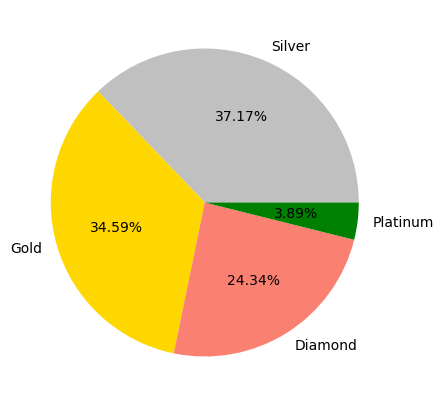

In [58]:
plt.figure(figsize=(6,5))

plt.pie(RFM_Score["Loyality_Label"].value_counts(), labels = RFM_Score["Loyality_Label"].value_counts().index, 
        autopct = '%.2f%%', colors = ["silver", "gold", "salmon", "green"] )

plt.show()

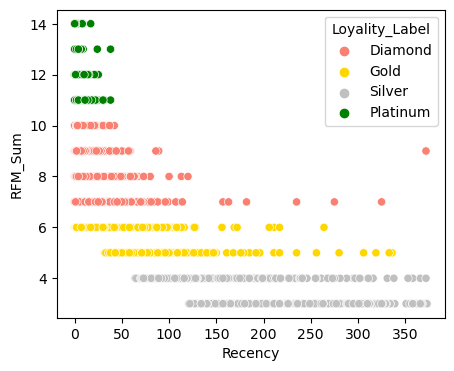

In [59]:
plt.figure(figsize=(5,4))

sns.scatterplot(data = RFM_Score, x = "Recency", y = "RFM_Sum", hue = "Loyality_Label", 
                palette = {"Platinum":"green", "Diamond":"salmon", "Gold":"gold", "Silver":"silver"})

plt.show()

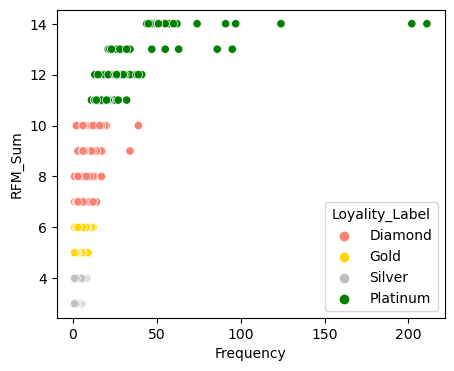

In [60]:
plt.figure(figsize=(5,4))

sns.scatterplot(data = RFM_Score, x = "Frequency", y = "RFM_Sum", hue = "Loyality_Label",
               palette = {"Platinum":"green", "Diamond":"salmon", "Gold":"gold", "Silver":"silver"})

plt.show()

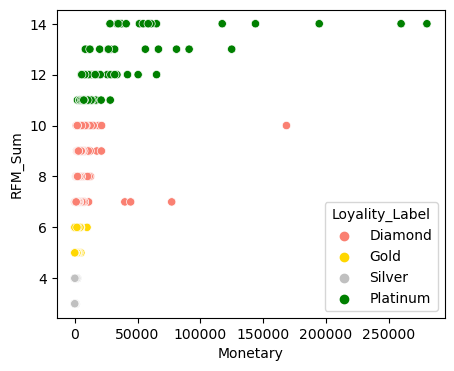

In [61]:
plt.figure(figsize=(5,4))

sns.scatterplot(data = RFM_Score, x = "Monetary", y = "RFM_Sum", hue = "Loyality_Label",
               palette = {"Platinum":"green", "Diamond":"salmon", "Gold":"gold", "Silver":"silver"})

plt.show()

# K - Means Clustering Algorithm

In [62]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Sum,Loyality_Label
0,12346.0,325,1,77183.60,1,1,5,7,Diamond
1,12347.0,2,7,4310.00,4,2,3,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,5,Gold
3,12349.0,18,1,1757.55,4,1,2,7,Diamond
4,12350.0,310,1,334.40,1,1,1,3,Silver


In [63]:
RFM_Score1 = RFM_Score.copy() 

In [64]:
RFM_Score1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Sum,Loyality_Label
0,12346.0,325,1,77183.60,1,1,5,7,Diamond
1,12347.0,2,7,4310.00,4,2,3,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,5,Gold
3,12349.0,18,1,1757.55,4,1,2,7,Diamond
4,12350.0,310,1,334.40,1,1,1,3,Silver


## Building Algorithm on Features -  Recency, Frequency, Monetary

In [65]:
RFM_Score1_K = RFM_Score1.iloc[:, 1:4]
RFM_Score1_K

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,7,4310.00
2,75,4,1797.24
3,18,1,1757.55
4,310,1,334.40
...,...,...,...
4334,277,1,180.60
4335,180,1,80.82
4336,7,2,178.05
4337,3,16,2094.88


## Scaling the data

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
SC = StandardScaler()
RFM_Score1_K_SC = SC.fit_transform(RFM_Score1_K)
RFM_Score1_K_SC

array([[ 2.32967293e+00, -4.24353614e-01,  8.35963391e+00],
       [-9.00448767e-01,  3.52171443e-01,  2.51046358e-01],
       [-1.70421263e-01, -3.60910855e-02, -2.85464504e-02],
       ...,
       [-8.50446884e-01, -2.94932771e-01, -2.08712435e-01],
       [-8.90448391e-01,  1.51695903e+00,  4.57171586e-03],
       [-5.00433697e-01, -1.65511928e-01, -2.40912314e-02]])

In [68]:
scaled_data = pd.DataFrame(RFM_Score1_K_SC, index = RFM_Score1_K.index, columns = RFM_Score1_K.columns)
scaled_data

,Recency,Frequency,Monetary
0,2.329673,-0.424354,8.359634
1,-0.900449,0.352171,0.251046
2,-0.170421,-0.036091,-0.028546
3,-0.740443,-0.424354,-0.032963
4,2.179667,-0.424354,-0.191315
...,...,...,...
4334,1.849655,-0.424354,-0.208429
4335,0.879618,-0.424354,-0.219531
4336,-0.850447,-0.294933,-0.208712
4337,-0.890448,1.516959,0.004572


In [69]:
from sklearn.cluster import KMeans

In [70]:
wcss = []

for k in range(1, 26):
    K_Means = KMeans(n_clusters = k, init = "k-means++", max_iter = 500, random_state = 111)
    K_Means.fit(scaled_data)            
    wcss.append(K_Means.inertia_)            

In [71]:
K_Value = range(1, 26)
K_wcss = list(zip(K_Value, wcss))

for i in K_wcss:
    print("K =", i[0], "--->", i[1])

K = 1 ---> 13017.000000000011
K = 2 ---> 9013.81860419884
K = 3 ---> 5440.662885965245
K = 4 ---> 4097.506212866189
K = 5 ---> 3141.1206511591713
K = 6 ---> 2471.1757534654075
K = 7 ---> 2021.2477974185274
K = 8 ---> 1714.1584837433725
K = 9 ---> 1441.2745306687877
K = 10 ---> 1280.9745790595525
K = 11 ---> 1123.8617351330736
K = 12 ---> 1017.1451383477051
K = 13 ---> 929.9916717480215
K = 14 ---> 853.7681052886466
K = 15 ---> 749.515217141729
K = 16 ---> 696.4510171651766
K = 17 ---> 633.4919786195862
K = 18 ---> 593.791897263388
K = 19 ---> 562.0747873028977
K = 20 ---> 524.9550937480592
K = 21 ---> 496.1289283241779
K = 22 ---> 476.91003802581486
K = 23 ---> 455.60134759729226
K = 24 ---> 422.7109215913687
K = 25 ---> 412.82044961492926


## Elbow Method

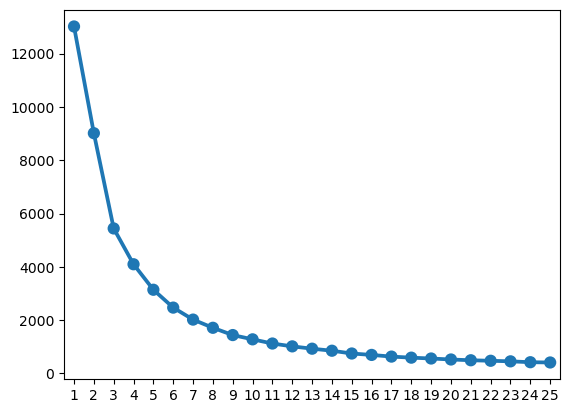

In [72]:
sns.pointplot(x = list(K_Value), y = wcss)
plt.show()

In [119]:
# Fitting and Predicting data using K-Means Algorithm ----> K=4

kmeans = KMeans(n_clusters= 4, init = "k-means++", max_iter = 500, random_state = 333)
y_kmeans = kmeans.fit_predict(scaled_data)

In [120]:
y_kmeans

array([3, 0, 0, ..., 0, 3, 0])

In [121]:
RFM_Score1["Cluster"] = kmeans.labels_

In [122]:
RFM_Score1.head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Sum,Loyality_Label,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,3
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,0
2,12348.0,75,4,1797.24,2,1,2,5,Gold,0
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,0
4,12350.0,310,1,334.40,1,1,1,3,Silver,2
5,12352.0,36,8,2506.04,3,2,3,8,Diamond,0
6,12353.0,204,1,89.00,1,1,1,3,Silver,2
7,12354.0,232,1,1079.40,1,1,2,4,Silver,2
8,12355.0,214,1,459.40,1,1,1,3,Silver,2
9,12356.0,22,3,2811.43,4,1,3,8,Diamond,0


In [123]:
# Algorithm based segmentation of customers.

RFM_Score1["Cluster"].value_counts()

0    3051
2    1061
3     214
1      13
Name: Cluster, dtype: int64

In [124]:
# Manually Segmentation of Customers.

RFM_Score1["Loyality_Label"].value_counts()

Silver      1613
Gold        1501
Diamond     1056
Platinum     169
Name: Loyality_Label, dtype: int64

## Evaluating the Clusters

In [125]:
from sklearn.metrics import silhouette_score

In [126]:
labels = kmeans.labels_
print("silhouette_score : ", silhouette_score(scaled_data, labels))

silhouette_score :  0.6159006083678373


- We found a reasonably good silhouette score. so, clustering is effective.

# Problem Statement - 2 : Analysing Sales Trend

- Highest Sales (Day, Month, Season, Timing)
- Rush Hour as per (Day, Month, Season) and as per Timing (Morning, Afternoon, Evening)
- Monthly Sales Trend

In [127]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [128]:
import datetime as dt

In [129]:
# Extraction of Day from InvoiceDate.

df_final["Day"] = df_final["InvoiceDate"].dt.day_name()

In [130]:
# Extraction of Month from InvoiceDate.

df_final["Month"] = df_final["InvoiceDate"].dt.month

In [131]:
# Extraction of Hour from InvoiceDate.

df_final["Hour"] = df_final["InvoiceDate"].dt.hour

In [132]:
df_final.head(10)

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8
5,536370,2010-12-01 08:45:00,12583.0,855.86,Wednesday,12,8
6,536371,2010-12-01 09:00:00,13748.0,204.00,Wednesday,12,9
7,536372,2010-12-01 09:01:00,17850.0,22.20,Wednesday,12,9
8,536373,2010-12-01 09:02:00,17850.0,259.86,Wednesday,12,9
9,536374,2010-12-01 09:09:00,15100.0,350.40,Wednesday,12,9


### Function to create Seasons and Time of the day

In [136]:
# Calculating Seasons

def seasons(month):
    if month in [11,12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8]:
        return "Monsoon"
    else:
        return "Post Monsoon"

In [307]:
# Calculating Time of the Day

def time_of_day(hour):
    if hour in range(3,6):
        return "Early Morning(3:00 - 5:00 Hours)"
    elif hour in range(6,12):
        return "Morning(6:00 - 11:00 Hours)"
    elif hour in range(12,16):
        return "AfterNoon(12:00 - 15:00 Hours)"
    elif hour in range(16,20):
        return "Evening(16:00 - 19:00 Hours)"
    else:
        return "Night(20:00 - 2:00 Hours)"

In [138]:
df_final["Season"] = df_final["Month"].apply(seasons)

In [308]:
df_final["Time of Day"] = df_final["Hour"].apply(time_of_day)

In [309]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum,Month,Month_Name,Season,Hour,Time of Day,Day,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
1,536366,2010-12-01 08:28:00,17850.0,22.20,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
2,536367,2010-12-01 08:34:00,13047.0,278.73,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
3,536368,2010-12-01 08:34:00,13047.0,70.05,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
4,536369,2010-12-01 08:35:00,13047.0,17.85,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
...,...,...,...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No
18562,581584,2011-12-09 12:25:00,13777.0,140.64,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No
18563,581585,2011-12-09 12:31:00,15804.0,329.05,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No
18564,581586,2011-12-09 12:49:00,13113.0,339.20,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No


In [142]:
df_final["Month_Name"] = df_final["InvoiceDate"].dt.month_name()

In [143]:
df_final["Weekend"] = np.where((df_final["Day"] == "Saturday") | (df_final["Day"] == "Sunday"), "Yes", "No")

In [144]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum,Day,Month,Hour,Season,Time of Day,Month_Name,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Winter,Morning(6:00 - 11:00 Hours),December,No
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Winter,Morning(6:00 - 11:00 Hours),December,No
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Winter,Morning(6:00 - 11:00 Hours),December,No
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Winter,Morning(6:00 - 11:00 Hours),December,No
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Winter,Morning(6:00 - 11:00 Hours),December,No
...,...,...,...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,Winter,AfterNoon(12:00 - 15:00 Hours),December,No
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,Winter,AfterNoon(12:00 - 15:00 Hours),December,No
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,Winter,AfterNoon(12:00 - 15:00 Hours),December,No
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,Winter,AfterNoon(12:00 - 15:00 Hours),December,No


In [145]:
# Rearranging

df_final = df_final[["InvoiceNo", "InvoiceDate", "CustomerID", "Total_Sum", "Month", "Month_Name", "Season", "Hour", 
                     "Time of Day", "Day", "Weekend"]]

In [149]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total_Sum,Month,Month_Name,Season,Hour,Time of Day,Day,Weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
1,536366,2010-12-01 08:28:00,17850.0,22.20,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
2,536367,2010-12-01 08:34:00,13047.0,278.73,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
3,536368,2010-12-01 08:34:00,13047.0,70.05,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
4,536369,2010-12-01 08:35:00,13047.0,17.85,12,December,Winter,8,Morning(6:00 - 11:00 Hours),Wednesday,No
...,...,...,...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No
18562,581584,2011-12-09 12:25:00,13777.0,140.64,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No
18563,581585,2011-12-09 12:31:00,15804.0,329.05,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No
18564,581586,2011-12-09 12:49:00,13113.0,339.20,12,December,Winter,12,AfterNoon(12:00 - 15:00 Hours),Friday,No


## Analyzing Rush Hour - (Total No.of Invoices)

### 1. Day

In [161]:
rush_day = df_final.groupby("Day")[["InvoiceNo"]].agg({"InvoiceNo":"count"}).reset_index()
rush_day = rush_day.rename(columns = {"InvoiceNo" : "No.of_Invoices"})
rush_day

,Day,No.of_Invoices
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


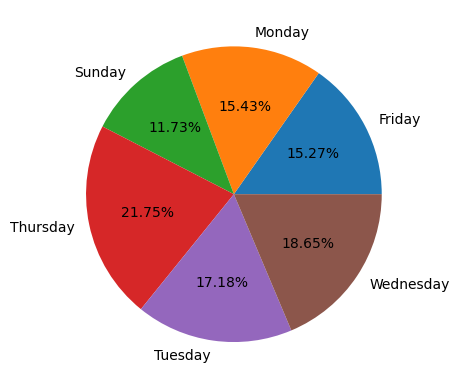

In [231]:
# Percentage of rush on different days.

plt.pie(rush_day["No.of_Invoices"], labels = rush_day["Day"], autopct = "%.2f%%")
plt.show()

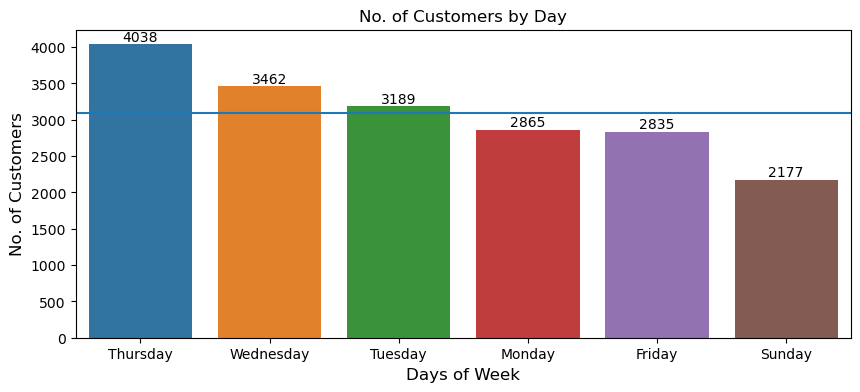

In [236]:
# Total no.of customers on different days on bar graph

plt.figure(figsize = (10,4))
day = df_final["Day"].value_counts()
ax = sns.barplot(x = day.index, y = day.values)

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = day.mean())

plt.title("No. of Customers by Day")
plt.ylabel("No. of Customers", fontsize = 12)
plt.xlabel("Days of Week", fontsize = 12)
plt.show()

### 2. Month

In [240]:
rush_month = df_final.groupby("Month_Name")[["InvoiceNo"]].agg({"InvoiceNo":"count"}).reset_index()
rush_month = rush_month.rename(columns = {"InvoiceNo" : "No.of_Invoices"})
rush_month

,Month_Name,No.of_Invoices
0,April,1153
1,August,1283
2,December,2179
3,February,1003
4,January,993
5,July,1331
6,June,1394
7,March,1324
8,May,1559
9,November,2660


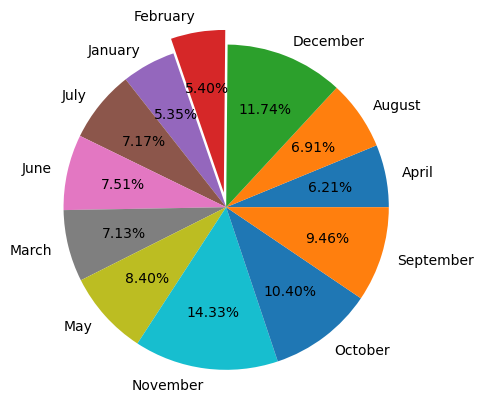

In [288]:
plt.pie(rush_month["No.of_Invoices"], labels = rush_month['Month_Name'], autopct = '%.2f%%', 
        explode = [0,0,0,0.1,0,0,0,0,0,0,0,0], pctdistance=0.65, radius = 1.1,)
plt.show()

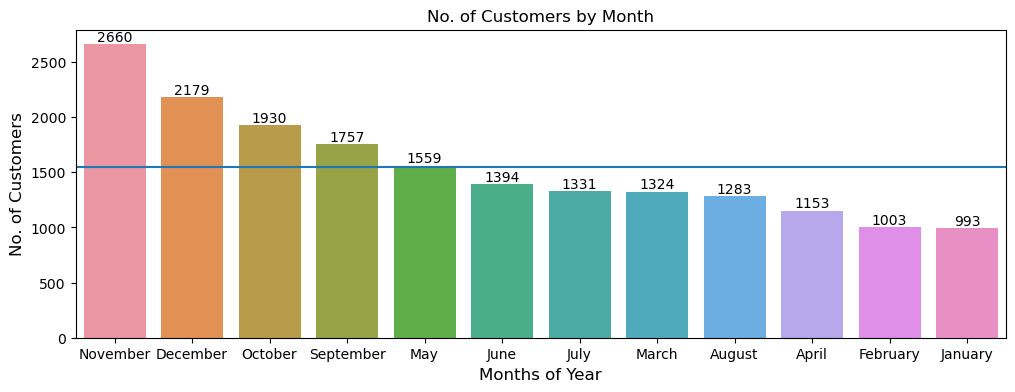

In [322]:
# Total no.of customers on different days on bar graph

plt.figure(figsize = (12,4))
month = df_final["Month_Name"].value_counts()
ax = sns.barplot(x = month.index, y = month.values)

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = month.mean())

plt.title("No. of Customers by Month")
plt.ylabel("No. of Customers", fontsize = 12)
plt.xlabel("Months of Year", fontsize = 12)
plt.show()

### 3. Seasons

In [290]:
rush_season = df_final.groupby("Season")[["InvoiceNo"]].agg({"InvoiceNo":"count"}).reset_index()
rush_season = rush_season.rename(columns = {"InvoiceNo" : "No.of_Invoices"})
rush_season

,Season,No.of_Invoices
0,Monsoon,4008
1,Post Monsoon,3687
2,Summer,4036
3,Winter,6835


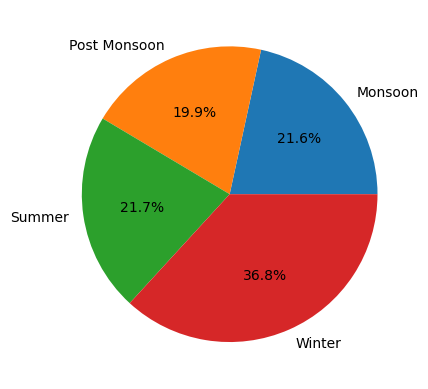

In [298]:
plt.pie(rush_season["No.of_Invoices"], labels = rush_season['Season'], autopct = '%.1f%%')
plt.show()

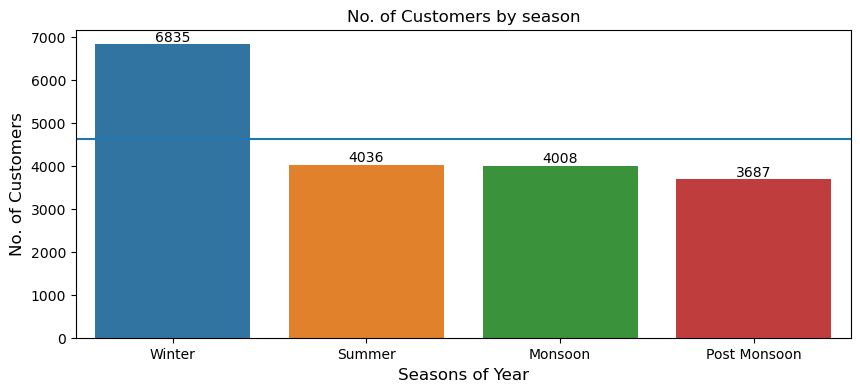

In [301]:
# Total no.of customers on different Seasons Graph

plt.figure(figsize = (10,4))
season = df_final["Season"].value_counts()
ax = sns.barplot(x = season.index, y = season.values)

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = season.mean())

plt.title("No. of Customers by season")
plt.ylabel("No. of Customers", fontsize = 12)
plt.xlabel("Seasons of Year", fontsize = 12)
plt.show()

### 4. Timing

In [310]:
rush_time = df_final.groupby("Time of Day")[["InvoiceNo"]].agg({"InvoiceNo":"count"}).reset_index()
rush_time = rush_time.rename(columns = {"InvoiceNo" : "No.of_Invoices"})
rush_time

,Time of Day,No.of_Invoices
0,AfterNoon(12:00 - 15:00 Hours),10095
1,Evening(16:00 - 19:00 Hours),1964
2,Morning(6:00 - 11:00 Hours),6489
3,Night(20:00 - 2:00 Hours),18


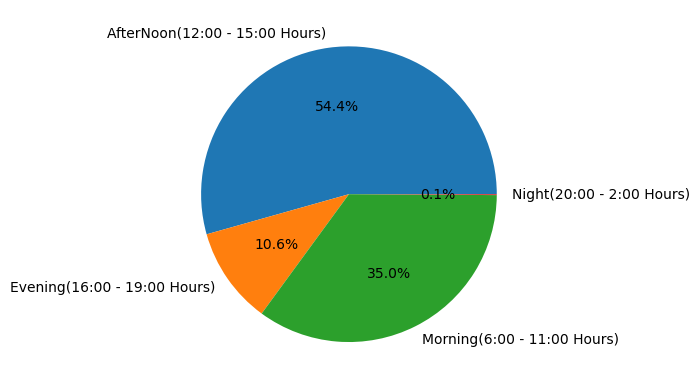

In [314]:
plt.pie(rush_time["No.of_Invoices"], labels = rush_time['Time of Day'], autopct = '%.1f%%')
plt.show()

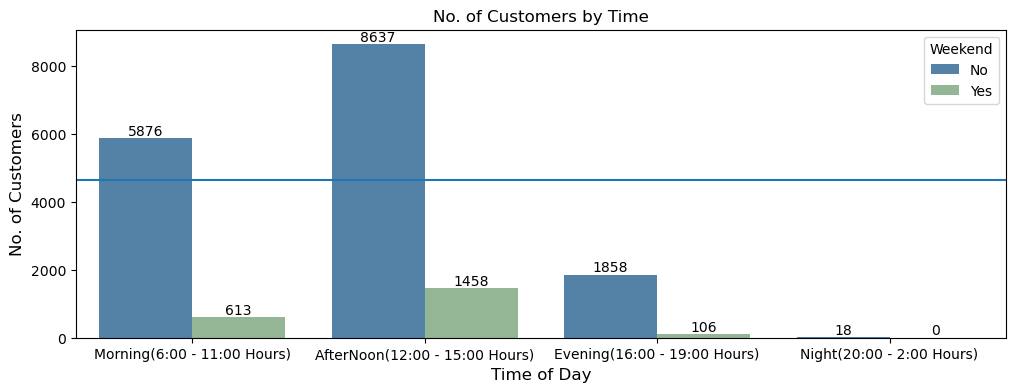

In [349]:
# Total no.of customers on Time of Day-Weekend Graph

plt.figure(figsize = (12,4))
time = df_final["Time of Day"].value_counts()
ax = sns.countplot(x = df_final["Time of Day"], hue = df_final["Weekend"], palette = ["steelblue", "darkseagreen"])

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = time.mean())

plt.title("No. of Customers by Time")
plt.ylabel("No. of Customers", fontsize = 12)
plt.xlabel("Time of Day", fontsize = 12)
plt.show()

## Analyzing Total Sales

### Day

In [353]:
day_sales = df_final.groupby("Day")["Total_Sum"].sum().to_frame("Total_Sales").reset_index().sort_values(by = "Total_Sales", ascending = False)
day_sales

,Day,Total_Sales
3,Thursday,1976859.070
4,Tuesday,1700634.631
5,Wednesday,1588336.170
0,Friday,1485917.401
1,Monday,1367146.411
2,Sunday,792514.221


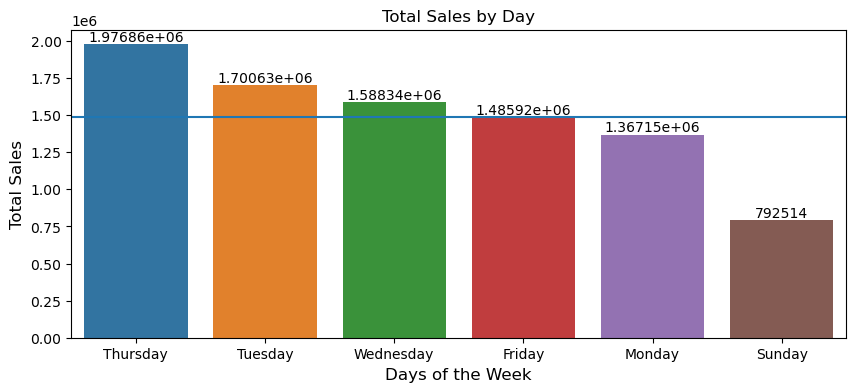

In [356]:
plt.figure(figsize = (10,4))

ax = sns.barplot(data = day_sales, x = "Day", y = "Total_Sales")

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = day_sales["Total_Sales"].mean())

plt.title("Total Sales by Day")
plt.ylabel("Total Sales", fontsize = 12)
plt.xlabel("Days of the Week", fontsize = 12)
plt.show()

- Thursday sale is higher than that of other days.
- There is no sale on Saturday. So, we can conclude that Mall is closed on every Saturday.

### Month

In [357]:
month_sales = df_final.groupby("Month_Name")["Total_Sum"].sum().to_frame("Total_Sales").reset_index().sort_values(by = "Total_Sales", ascending = False)
month_sales

,Month_Name,Total_Sales
9,November,1161817.380
2,December,1090906.680
10,October,1039318.790
11,September,952838.382
8,May,678594.560
6,June,661213.690
1,August,645343.900
5,July,600091.011
7,March,595500.760
4,January,569445.040


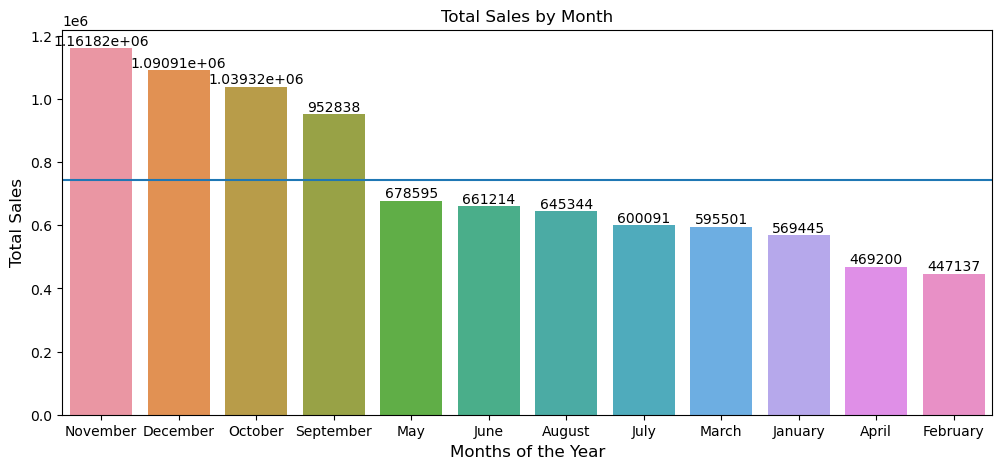

In [363]:
plt.figure(figsize = (12,5))

ax = sns.barplot(data = month_sales, x = "Month_Name", y = "Total_Sales")

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = month_sales["Total_Sales"].mean())

plt.title("Total Sales by Month")
plt.ylabel("Total Sales", fontsize = 12)
plt.xlabel("Months of the Year", fontsize = 12)
plt.show()

### Seasons

In [364]:
season_sales = df_final.groupby("Season")["Total_Sum"].sum().to_frame("Total_Sales").reset_index().sort_values(by = "Total_Sales", ascending = False)
season_sales

,Season,Total_Sales
3,Winter,3269306.450
1,Post Monsoon,1992157.172
0,Monsoon,1906648.601
2,Summer,1743295.681


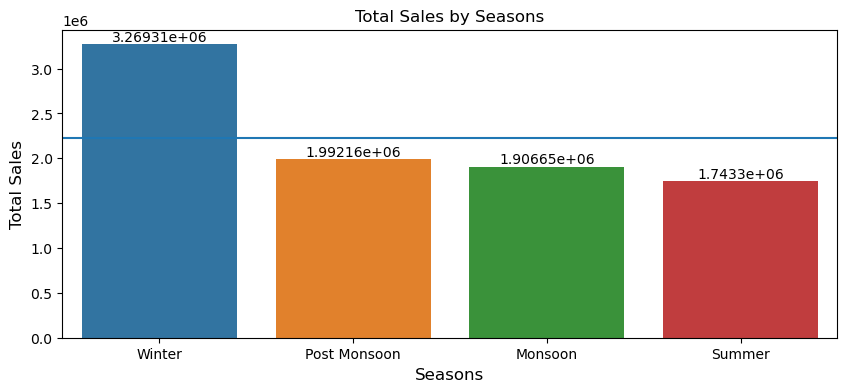

In [367]:
plt.figure(figsize = (10,4))

ax = sns.barplot(data = season_sales, x = "Season", y = "Total_Sales")

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = season_sales["Total_Sales"].mean())

plt.title("Total Sales by Seasons")
plt.ylabel("Total Sales", fontsize = 12)
plt.xlabel("Seasons", fontsize = 12)
plt.show()

### Timing

In [368]:
time_sales = df_final.groupby("Time of Day")["Total_Sum"].sum().to_frame("Total_Sales").reset_index().sort_values(by = "Total_Sales", ascending = False)
time_sales

,Time of Day,Total_Sales
0,AfterNoon(12:00 - 15:00 Hours),4513657.351
2,Morning(6:00 - 11:00 Hours),3521535.582
1,Evening(16:00 - 19:00 Hours),857282.211
3,Night(20:00 - 2:00 Hours),18932.760


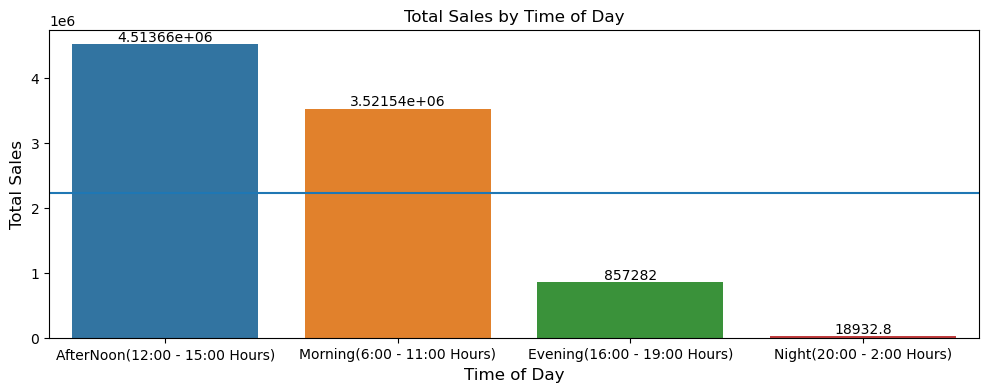

In [387]:
plt.figure(figsize = (12,4))

ax = sns.barplot(data = time_sales, x = "Time of Day", y = "Total_Sales")

for values in ax.containers:
    ax.bar_label(values)

# Plotting the average line
plt.axhline(y = time_sales["Total_Sales"].mean())

plt.title("Total Sales by Time of Day")
plt.ylabel("Total Sales", fontsize = 12)
plt.xlabel("Time of Day", fontsize = 12)
plt.show()

## Sales Trend

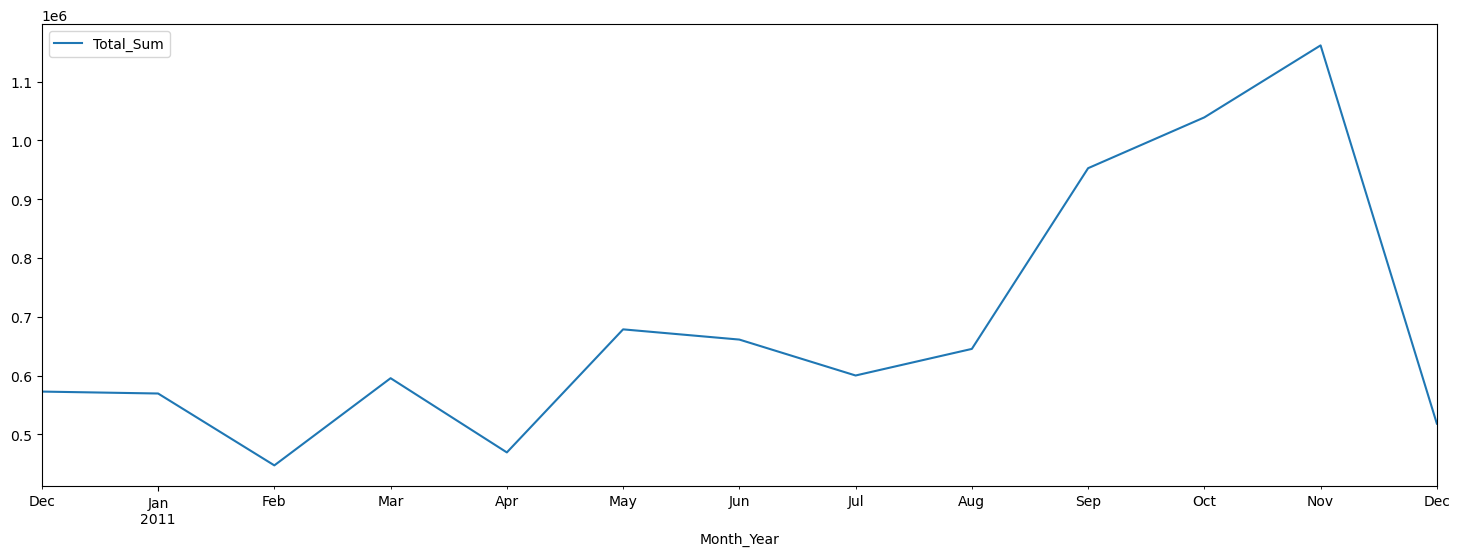

In [422]:
df_final['Month_Year'] = df_final['InvoiceDate'].dt.to_period('M')
sales = df_final.groupby(['Month_Year']).sum()
sales[['Total_Sum']].plot(figsize=(18, 6))

plt.show()

- Overall sale is in increasing trend.
- Winter season mainly November and December sales are high. Reason can be festive season mostly.

# Problem Statement - 3 : Top 10 Selling Products

In [432]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [433]:
df_top = df.copy()

In [436]:
df_top = df_top.drop(["lower", "CustomerID"], axis=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [438]:
# Finding the Total Sale by multiplying the Quantity and Unit Price

df_top['Total_Sum'] = df_top['Quantity'] * df_top['UnitPrice']
df_top.drop(['UnitPrice'], axis=1, inplace=True)
df_top.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Country,Total_Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,United Kingdom,20.34


## Overall Sale of a Product using Pivot Table

In [444]:
df_top_total = df_top.pivot_table(values = "Total_Sum", index = "Description", aggfunc = "sum", sort = True).reset_index()

In [445]:
df_top_total.head()

,Description,Total_Sum
0,20713,0.00
1,4 PURPLE FLOCK DINNER CANDLES,290.80
2,50'S CHRISTMAS GIFT BAG LARGE,2341.13
3,DOLLY GIRL BEAKER,2882.50
4,I LOVE LONDON MINI BACKPACK,1628.17


## Top 10 Selling Product by "Total_Sales"

In [447]:
top_10_total = df_top_total.sort_values(by = "Total_Sum", ascending = False).head(10)
top_10_total

,Description,Total_Sum
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


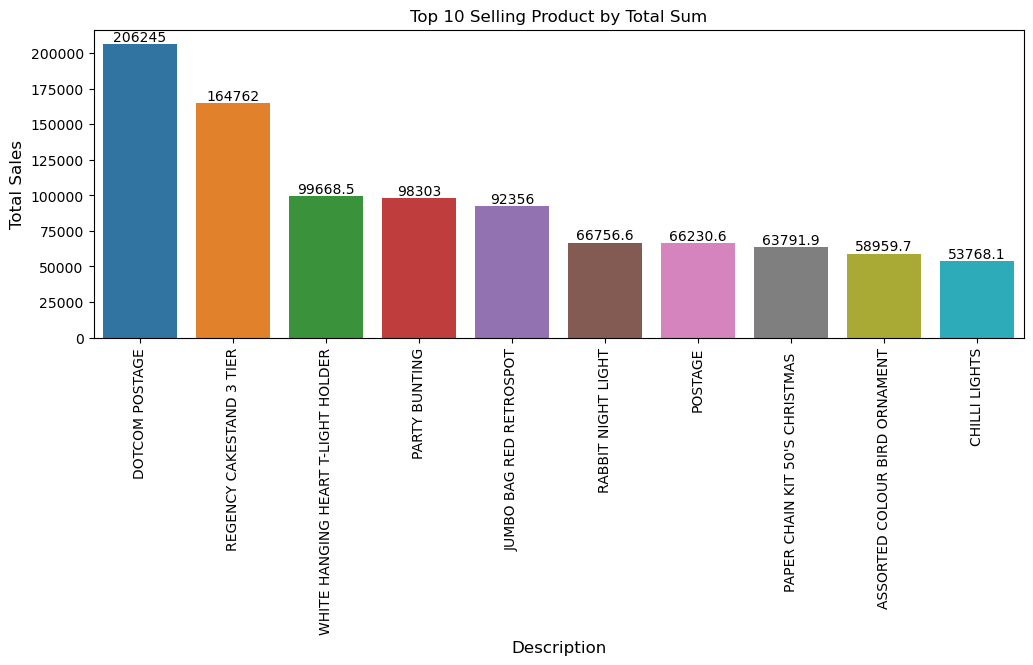

In [470]:
plt.figure(figsize = (12,4))

ax = sns.barplot(data = top_10_total, x = "Description", y = "Total_Sum")

for values in ax.containers:
    ax.bar_label(values)

plt.title("Top 10 Selling Product by Total Sum")
plt.ylabel("Total Sales", fontsize = 12)
plt.xlabel("Description", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

## Top 10 Selling Product by "Quantity"

In [458]:
df_top_quantity = df_top.pivot_table(values = "Quantity", index = "Description", aggfunc = "sum", sort = True).reset_index()
df_top_quantity

,Description,Quantity
0,20713,-400
1,4 PURPLE FLOCK DINNER CANDLES,144
2,50'S CHRISTMAS GIFT BAG LARGE,1913
3,DOLLY GIRL BEAKER,2448
4,I LOVE LONDON MINI BACKPACK,389
...,...,...
4218,wrongly marked carton 22804,-256
4219,wrongly marked. 23343 in box,-3100
4220,wrongly sold (22719) barcode,170
4221,wrongly sold as sets,-600


In [460]:
top_10_quantity = df_top_quantity.sort_values(by = "Quantity", ascending = False).head(10)
top_10_quantity

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


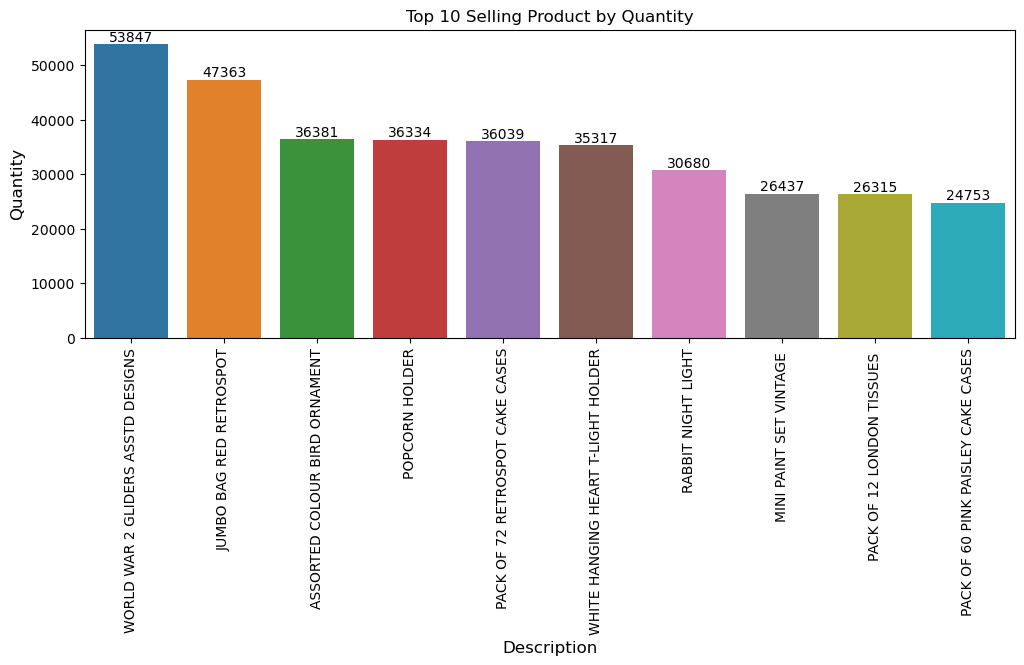

In [469]:
plt.figure(figsize = (12,4))

ax = sns.barplot(data = top_10_quantity, x = "Description", y = "Quantity")

for values in ax.containers:
    ax.bar_label(values)

plt.title("Top 10 Selling Product by Quantity")
plt.ylabel("Quantity", fontsize = 12)
plt.xlabel("Description", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

## Top 10 Returned Product

In [465]:
df_top_returned = df_top.pivot_table(values = "Quantity", index = "Description", aggfunc = "sum", sort = True).reset_index()
df_top_returned

,Description,Quantity
0,20713,-400
1,4 PURPLE FLOCK DINNER CANDLES,144
2,50'S CHRISTMAS GIFT BAG LARGE,1913
3,DOLLY GIRL BEAKER,2448
4,I LOVE LONDON MINI BACKPACK,389
...,...,...
4218,wrongly marked carton 22804,-256
4219,wrongly marked. 23343 in box,-3100
4220,wrongly sold (22719) barcode,170
4221,wrongly sold as sets,-600


In [466]:
top_10_returned = df_top_returned.sort_values(by = "Quantity").head(10)
top_10_returned

,Description,Quantity
4167,printing smudges/thrown away,-19200
3740,"Unsaleable, destroyed.",-15644
4116,check,-12030
2796,Printing smudges/thrown away,-9058
1123,Damaged,-7540
4194,throw away,-5368
4126,damages,-4338
4147,incorrect stock entry.,-4320
4195,thrown away,-4110
4219,wrongly marked. 23343 in box,-3100


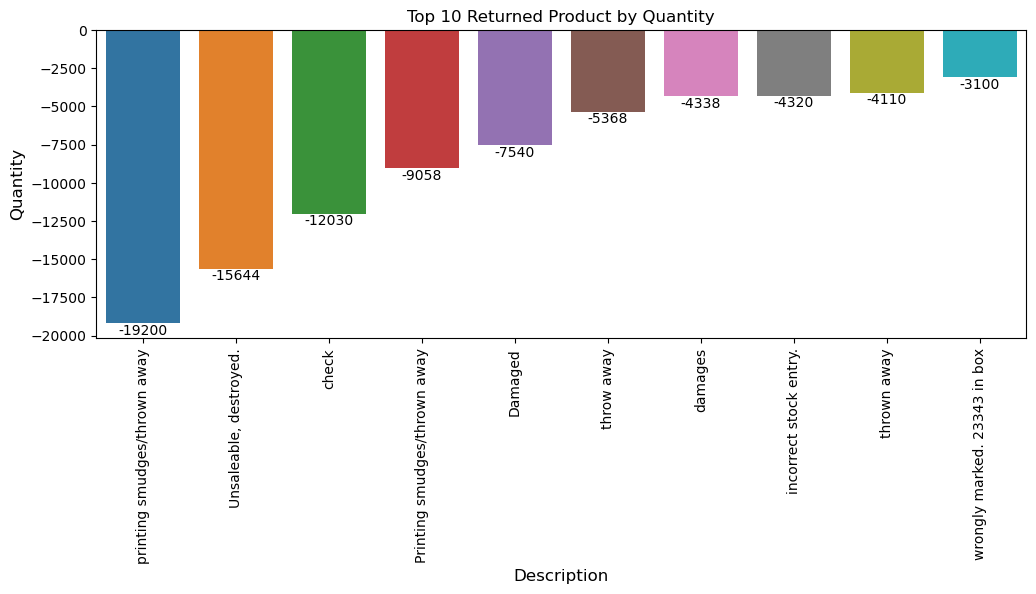

In [468]:
plt.figure(figsize = (12,4))

ax = sns.barplot(data = top_10_returned, x = "Description", y = "Quantity")

for values in ax.containers:
    ax.bar_label(values)

plt.title("Top 10 Returned Product by Quantity")
plt.ylabel("Quantity", fontsize = 12)
plt.xlabel("Description", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

- As per Total Sale amount, most Selling product in the mall is '**DotCom Postage**'.
- As per Quantity, most Selling Product is '**WORLD WAR 2 GLIDERS ASSTD DESIGNS**'.
- Most Returned Product is '**Printing Smudges/thrown away**'

## Best Product at Country Level

In [471]:
df_top.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Country,Total_Sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,United Kingdom,20.34


In [472]:
df_country = df_top.pivot_table(values='Total_Sum', index=['Country','Description'], aggfunc='sum', sort = False).reset_index()

In [484]:
df_country.head(10)

,Country,Description,Total_Sum
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43
5,United Kingdom,SET 7 BABUSHKA NESTING BOXES,11443.17
6,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,2349.53
7,United Kingdom,HAND WARMER UNION JACK,9929.22
8,United Kingdom,HAND WARMER RED POLKA DOT,225.00
9,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,54662.15


In [517]:
# Post identifying the sales of each product at a country level, Picking the highest sale value by grouping.

df_Cntry = df_country.groupby(["Country"]).max().reset_index()
df_Cntry.head()

,Country,Total_Sum
0,Australia,3375.84
1,Austria,1456.00
2,Bahrain,120.00
3,Belgium,4248.00
4,Brazil,175.20


In [519]:
# Creating the Primary Key

df_Cntry["Primary"] = df_Cntry["Country"] + " " + (df_Cntry["Total_Sum"].map(str))
df_Cntry.head()

,Country,Total_Sum,Primary
0,Australia,3375.84,Australia 3375.84
1,Austria,1456.00,Austria 1456.0
2,Bahrain,120.00,Bahrain 120.0
3,Belgium,4248.00,Belgium 4248.0
4,Brazil,175.20,Brazil 175.2


In [521]:
# Creating a Primary key by merging two columns for the initial table (df_Country)

df_country["Primary"] = df_country["Country"]+' '+(df_country["Total_Sum"].map(str))
df_country.head()

,Country,Description,Total_Sum,Primary
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07,United Kingdom 93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25,United Kingdom 7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17,United Kingdom 5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79,United Kingdom 15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43,United Kingdom 21013.43


In [522]:
"""
After extracting the max sale value at a country level, to identify the Prodcut name on basis of the Sale and Country Value 
Merge these two tables(df_country and df_Cntry) using left join.
"""
df_mrg = df_Cntry.merge(df_country, how = "left", on = "Primary")
df_mrg.head()

,Country_x,Total_Sum_x,Primary,Country_y,Description,Total_Sum_y
0,Australia,3375.84,Australia 3375.84,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,1456.00,Austria 1456.0,Austria,POSTAGE,1456.00
2,Bahrain,120.00,Bahrain 120.0,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,4248.00,Belgium 4248.0,Belgium,POSTAGE,4248.00
4,Brazil,175.20,Brazil 175.2,Brazil,REGENCY CAKESTAND 3 TIER,175.20


In [524]:
best_prd_cntry = df_mrg[["Country_x", "Description", "Total_Sum_x"]]
best_prd_cntry.rename(columns = {"Country_x" : "Country", "Total_Sum_x" : "Total_Sales"}, inplace = True)

In [525]:
best_prd_cntry

,Country,Description,Total_Sales
0,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,POSTAGE,1456.00
2,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,POSTAGE,4248.00
4,Brazil,REGENCY CAKESTAND 3 TIER,175.20
5,Canada,POSTAGE,550.94
6,Channel Islands,REGENCY CAKESTAND 3 TIER,517.80
7,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,580.00
8,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,70.80
9,Denmark,RED KITCHEN SCALES,734.40


## Top 10 Country with Maximum Sales

In [526]:
df_country

,Country,Description,Total_Sum,Primary
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07,United Kingdom 93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25,United Kingdom 7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17,United Kingdom 5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79,United Kingdom 15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43,United Kingdom 21013.43
...,...,...,...,...
20171,Belgium,HAND WARMER RED RETROSPOT,25.20,Belgium 25.200000000000003
20172,Belgium,HAND WARMER OWL DESIGN,25.20,Belgium 25.200000000000003
20173,Belgium,HANGING JAM JAR T-LIGHT HOLDERS,10.20,Belgium 10.2
20174,Germany,HAND WARMER UNION JACK,25.20,Germany 25.200000000000003


In [531]:
top_cntry_maxsales = df_country.groupby("Country").agg({"Total_Sum" : "sum"}).reset_index().sort_values(by = "Total_Sum", ascending = False)

In [536]:
top_cntry_maxsales.rename(columns = {"Total_Sum" : "Sum_of_Sales"}, inplace = True)
top_cntry_maxsales.head(10)

,Country,Sum_of_Sales
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


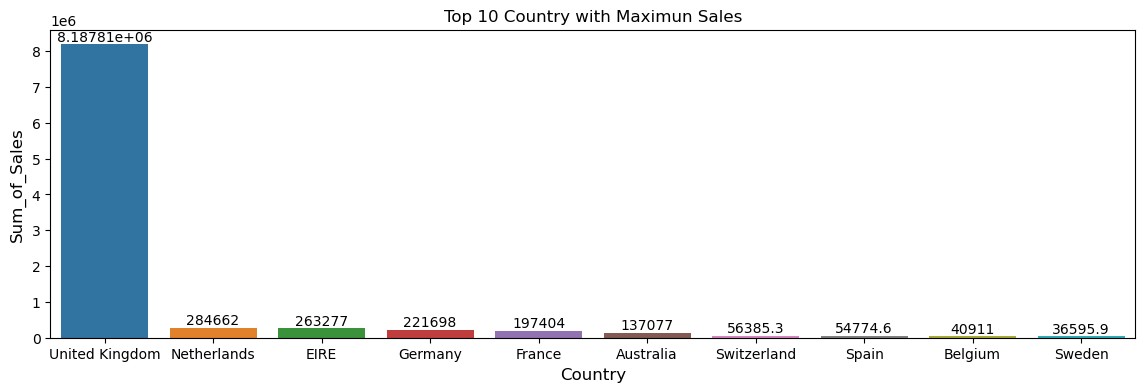

In [545]:
plt.figure(figsize = (14,4))

ax = sns.barplot(data = top_cntry_maxsales.head(10), x = "Country", y = "Sum_of_Sales")

for values in ax.containers:
    ax.bar_label(values)

plt.title("Top 10 Country with Maximun Sales")
plt.ylabel("Sum_of_Sales", fontsize = 12)
plt.xlabel("Country", fontsize = 12)
plt.show()

- **UK** has very large sale as compared to that of other countries and "**DOTCOM POSTAGE**" is most sale product in UK.

# Problem Statement - 4 : Customer Life Time Value

In [546]:
df_cltv = df1.copy()

In [548]:
df_cltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sum
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [553]:
RFM_Score1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Sum,Loyality_Label,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,3
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,0
2,12348.0,75,4,1797.24,2,1,2,5,Gold,0
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,0
4,12350.0,310,1,334.40,1,1,1,3,Silver,2


In [554]:
RFM_Score1.shape

(4339, 10)

In [555]:
# Average Order Value 

df_cltv["avg_order_value"] = RFM_Score1["Monetary"] / RFM_Score1["Frequency"]

In [556]:
df_cltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sum,avg_order_value
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000


In [557]:
RFM_Score1["Frequency"].sum()

18566

In [561]:
# Purchase Frequency

purchase_frequency = RFM_Score1["Frequency"].sum() / RFM_Score1.shape[0]
print("Purchase Frequency : ", purchase_frequency)

Purchase Frequency :  4.278866098179304


In [562]:
# Repeat Rate

repeat_rate = RFM_Score1[RFM_Score1["Frequency"]>1].shape[0] / RFM_Score1.shape[0]
print("Repeat Rate : ", repeat_rate)

Repeat Rate :  0.6561419681954367


In [563]:
# Churn Rate

churn_rate = 1 - repeat_rate
print("Churn Rate : ", churn_rate)

Churn Rate :  0.3438580318045633


In [576]:
# Profit Margin = 25%

df_cltv["Profit_Margin"] = RFM_Score1["Monetary"] * 0.25

In [581]:
# Customer Value

df_cltv["Cust_value"] = df_cltv["avg_order_value"] * purchase_frequency / churn_rate

In [582]:
df_cltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sum,avg_order_value,Profit_Margin,Cust_value
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000,19295.9000,960449.542627
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286,1077.5000,7661.763692
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000,449.3100,5591.078727
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000,439.3875,21870.424464
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000,83.6000,4161.173190


In [583]:
# CUSTOMER LIFETIME VALUE

df_cltv["CLTV"] = df_cltv["Cust_value"] * df_cltv["Profit_Margin"]

In [584]:
df_cltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sum,avg_order_value,Profit_Margin,Cust_value,CLTV
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000,19295.9000,960449.542627,1.853274e+10
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286,1077.5000,7661.763692,8.255550e+06
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000,449.3100,5591.078727,2.512128e+06
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000,439.3875,21870.424464,9.609591e+06
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000,83.6000,4161.173190,3.478741e+05


In [585]:
# Creation of the Column - "month_year"

df_cltv["month_year"] = df_cltv["InvoiceDate"].apply(lambda x: x.strftime("%b-%Y")) # extract the month and year
df_cltv.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sum,avg_order_value,Profit_Margin,Cust_value,CLTV,month_year
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000,19295.9000,960449.542627,1.853274e+10,Dec-2010
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286,1077.5000,7661.763692,8.255550e+06,Dec-2010
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000,449.3100,5591.078727,2.512128e+06,Dec-2010
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000,439.3875,21870.424464,9.609591e+06,Dec-2010
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000,83.6000,4161.173190,3.478741e+05,Dec-2010


In [587]:
"""
creating a pivot table taking the columns as input and groups the entries 
into two dimentsional table in such a way that provides a multidimentsional 
summation of the data.
"""
sale = df_cltv.pivot_table(index = ["CustomerID"], columns = ["month_year"], values = "Total_Sum", aggfunc = "sum", 
                           fill_value = 0).reset_index()

In [589]:
sale.head(10)

month_year,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.00,0.0,0.00,0.00,0.0
1,12347.0,636.25,584.91,711.79,224.82,0.0,475.39,0.0,382.52,0.00,0.0,0.00,1294.32,0.0
2,12348.0,367.00,0.00,892.80,0.00,0.0,227.44,0.0,0.00,0.00,0.0,0.00,0.00,310.0
3,12349.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1757.55,0.00,0.0
4,12350.0,0.00,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
5,12352.0,0.00,0.00,0.00,0.00,296.5,0.00,0.0,0.00,1265.31,0.0,311.73,0.00,632.5
6,12353.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,89.0,0.00,0.00,0.0
7,12354.0,1079.40,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0
8,12355.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,459.4,0.00,0.00,0.0
9,12356.0,481.46,0.00,0.00,0.00,0.0,2271.62,0.0,0.00,0.00,0.0,58.35,0.00,0.0


In [590]:
sale["CLV"] = sale.iloc[:,2:].sum(axis=1) # Sum all the months sale.

In [591]:
sale.head(10)

month_year,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.00,0.0,0.00,0.00,0.0,77183.60
1,12347.0,636.25,584.91,711.79,224.82,0.0,475.39,0.0,382.52,0.00,0.0,0.00,1294.32,0.0,3673.75
2,12348.0,367.00,0.00,892.80,0.00,0.0,227.44,0.0,0.00,0.00,0.0,0.00,0.00,310.0,1430.24
3,12349.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1757.55,0.00,0.0,1757.55
4,12350.0,0.00,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,334.40
5,12352.0,0.00,0.00,0.00,0.00,296.5,0.00,0.0,0.00,1265.31,0.0,311.73,0.00,632.5,2506.04
6,12353.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,89.0,0.00,0.00,0.0,89.00
7,12354.0,1079.40,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00
8,12355.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,459.4,0.00,0.00,0.0,459.40
9,12356.0,481.46,0.00,0.00,0.00,0.0,2271.62,0.0,0.00,0.00,0.0,58.35,0.00,0.0,2329.97


In [592]:
"""
Now, let's build a Regression Model for existing customers. We need a set of Dependent (Y) and Independent variables (X). 
So, we shall take last six-month data as independent variables and total revenue over three years as a dependent variable.
"""
x = sale[["Jul-2011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", "Dec-2011"]]
y = sale["CLV"]

In [598]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [599]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [600]:
print("Intercept Value :", lr.intercept_)
print("Coefficient Value :", lr.coef_)

Intercept Value : 135.08008511588832
Coefficient Value : [2.09241612 2.42537157 1.4573906  2.02297766 0.87823132 1.01034406]


In [601]:
from sklearn import metrics

print("R-Suare :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Suare : 0.9835776185757205
MAE : 585.4735194326983
MSE : 1388109.2232573526
RMSE : 1178.1804714292937


In [ ]:
"""
- When the model is deployed the ML algorithm helps to understand the patterns.It will also categorize the customers according 
  to their CLTV predictions.
- The Marketing strategy is important here considering that CLTV can figure out most profitable cutomers, but how we are going 
  to make profit from them will depend on the adopted marketing strategy. 
- Moreover, the loyalty programscan be formulated based on the insights.

"""

"""
Limitations:-

- It is not clear how a regression model can be used to forecast the dynamics of buyer behavior well into the future and 
  then tie it all back into the present value for each customer.

"""